In [6]:
from chenkov_mccolgan import *
%matplotlib inline

# Load the model and data

In [2]:
model = create_model()
model.load_weights('model_convnet_6')
calcium_train, calcium_train_padded, spikes_train_padded,\
calcium_test, calcium_test_padded, ids_oneshot, ids_oneshot_test,\
ids_stacked, ids_test_stacked, sample_weight = load_data()

# Inspect the model filters
The most easily interpreted parts of the model are the input convolutional layers

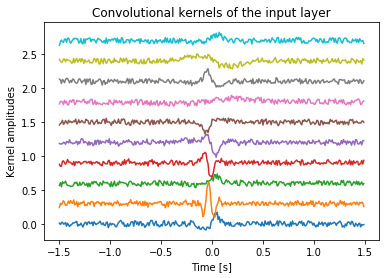

In [7]:
plot_kernels(model)

# Predict spiking activity

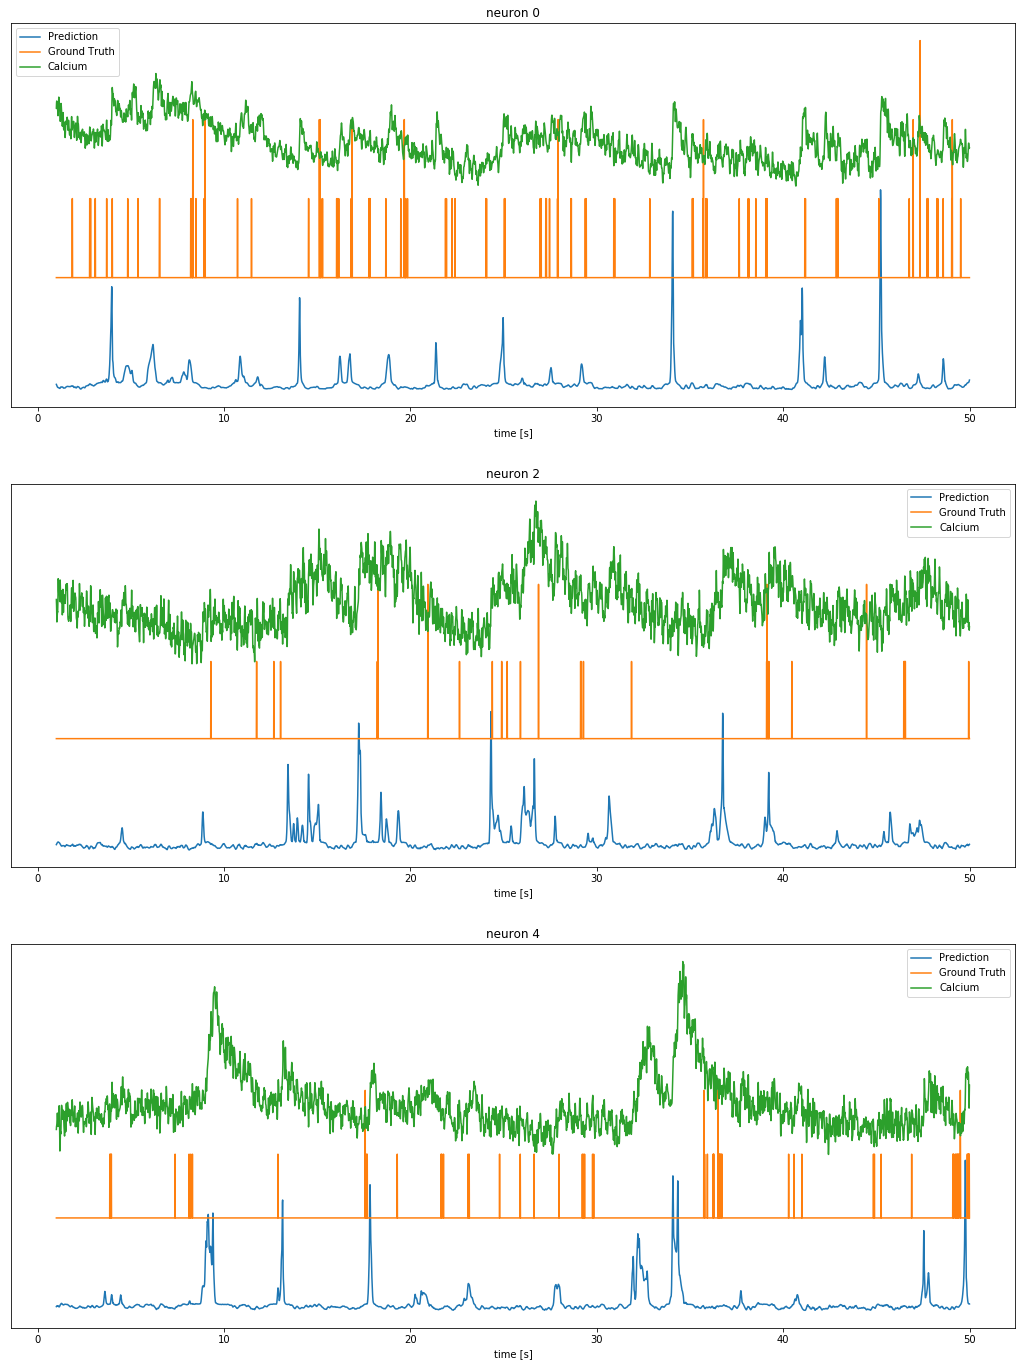

In [42]:
spikes_train_predict = model.predict([calcium_test_padded, ids_oneshot_test])
f = plt.figure(figsize=(18,24))

# choose time window
window = np.arange(100,5000)
time_sec = window/100.

for ii,neuron_index in enumerate([0,2,4]):
    spikes_train_smoothed = spikes_train_padded[neuron_index,window,0] #np.correlate(spikes_train_padded[neuron_index,window,0],0.1*np.ones(10),mode='same')
    ax = plt.subplot(3,1,ii+1)
    ax.plot(time_sec,1000*(spikes_train_predict[neuron_index,window,0]
                           -spikes_train_predict[neuron_index,window,0].mean()),label='Prediction')
    ax.plot(time_sec,1.5*spikes_train_smoothed+2.,label='Ground Truth')
    ax.plot(time_sec,(calcium_test_padded[neuron_index,window])+4.,label='Calcium')
    ax.legend()

    plt.title( 'neuron %s' % neuron_index)

    plt.xlabel('time [s]')

    ax.get_yaxis().set_visible(False)